<a href="https://colab.research.google.com/github/Shankar373/saiket_systems/blob/main/Customer_Churn_Analysis_and__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/saiket_systems/Telco_Customer_Churn_Dataset  (2).csv'
telco_data = pd.read_csv(file_path)

print("Dataset Overview:")
print(telco_data.head())


Dataset Overview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

# 2. Data Transformation

In [2]:
print("\nMissing Values:")
print(telco_data.isnull().sum())

telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].mean(), inplace=True)

print("\nDuplicate Rows:", telco_data.duplicated().sum())

telco_data_cleaned = telco_data.drop_duplicates()

print("\nCleaned Dataset Info:")
print(telco_data_cleaned.info())



Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicate Rows: 0

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 no

<ipython-input-2-7417ef2e5fd3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].mean(), inplace=True)


# 3. Churn Rate Overview



Churn Rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


<ipython-input-3-829126d92571>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")


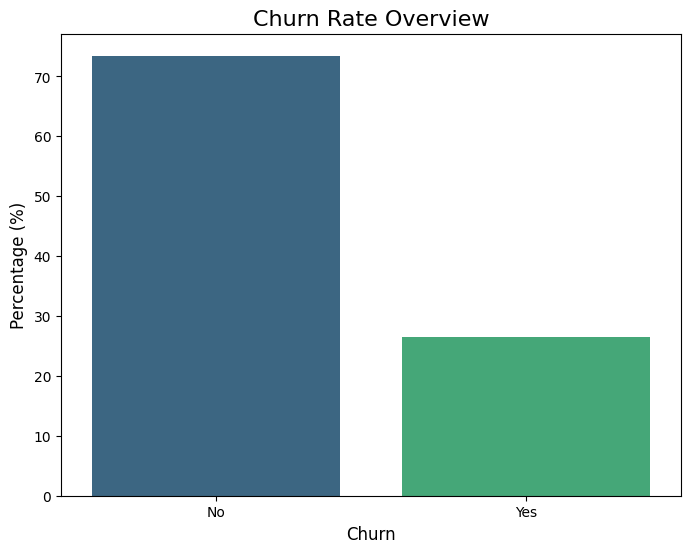

In [3]:
churn_rate = telco_data_cleaned['Churn'].value_counts(normalize=True) * 100
print("\nChurn Rate:\n", churn_rate)

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
plt.title("Churn Rate Overview", fontsize=16)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.show()


# 4. Customer Demographics

a. Gender Distribution

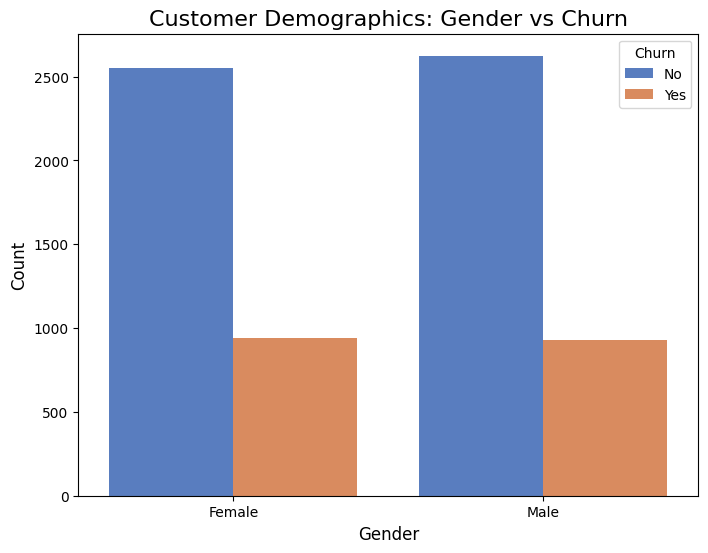

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_data_cleaned, x='gender', hue='Churn', palette="muted")
plt.title("Customer Demographics: Gender vs Churn", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn")
plt.show()


b. Partner Status

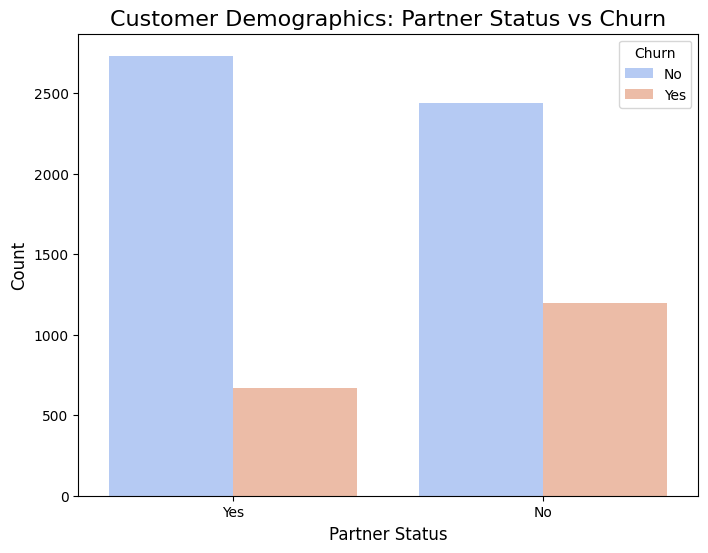

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_data_cleaned, x='Partner', hue='Churn', palette="coolwarm")
plt.title("Customer Demographics: Partner Status vs Churn", fontsize=16)
plt.xlabel("Partner Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn")
plt.show()


c. Dependent Status

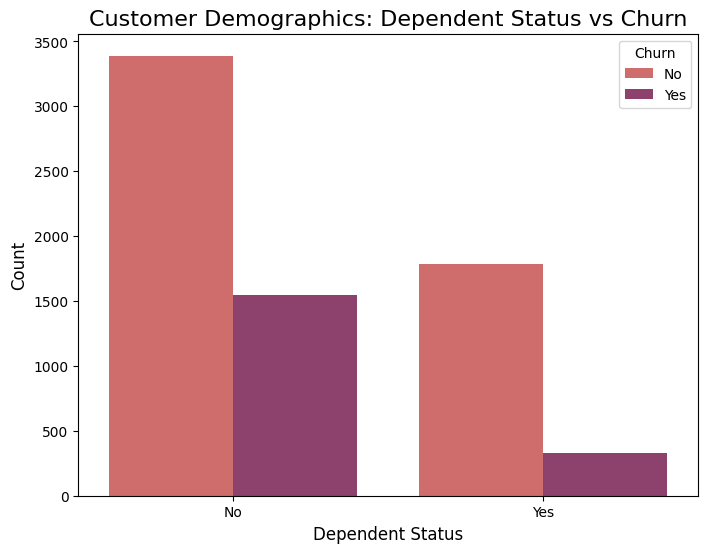

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=telco_data_cleaned, x='Dependents', hue='Churn', palette="flare")
plt.title("Customer Demographics: Dependent Status vs Churn", fontsize=16)
plt.xlabel("Dependent Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn")
plt.show()


# 5. Customer Tenure Analysis

a. Tenure Distribution (Histogram)

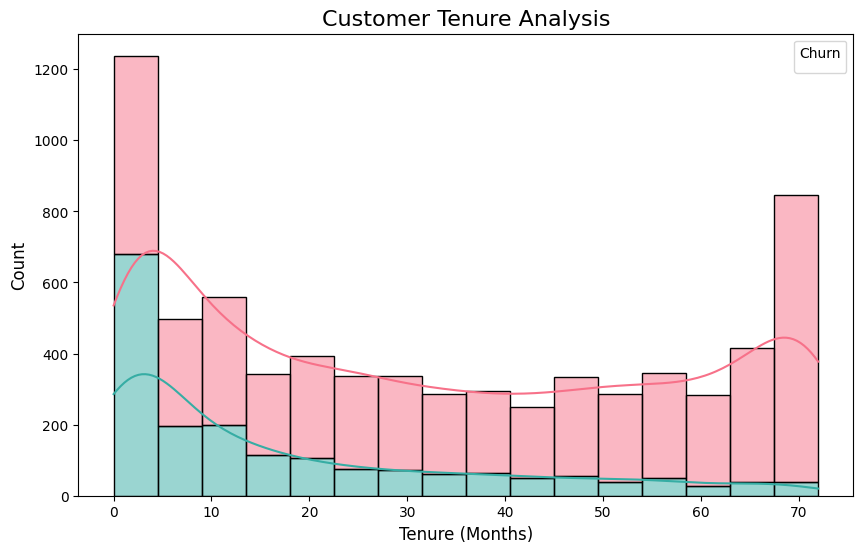

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=telco_data_cleaned, x='tenure', kde=True, hue='Churn', multiple='stack', palette="husl")
plt.title("Customer Tenure Analysis", fontsize=16)
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn")
plt.show()


b. Tenure Distribution by Churn (Box Plot)

<ipython-input-8-9ffe2dc28180>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=telco_data_cleaned, x='Churn', y='tenure', palette="pastel")


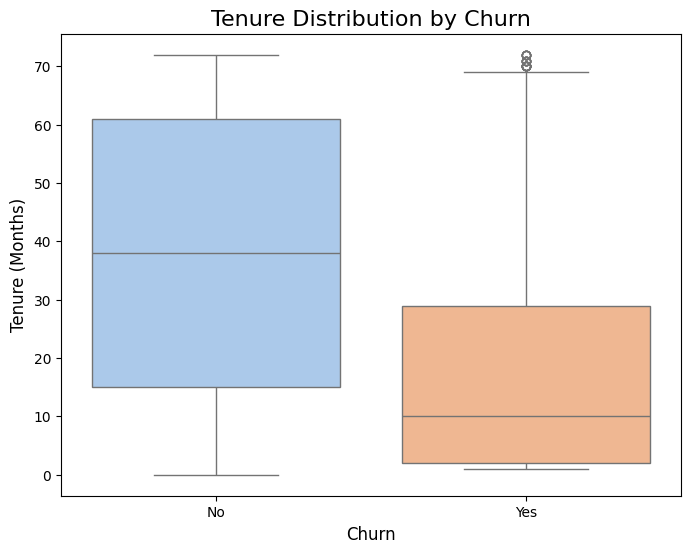

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=telco_data_cleaned, x='Churn', y='tenure', palette="pastel")
plt.title("Tenure Distribution by Churn", fontsize=16)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Tenure (Months)", fontsize=12)
plt.show()


# 6. Churn Analysis

a. Churn by Contract Type

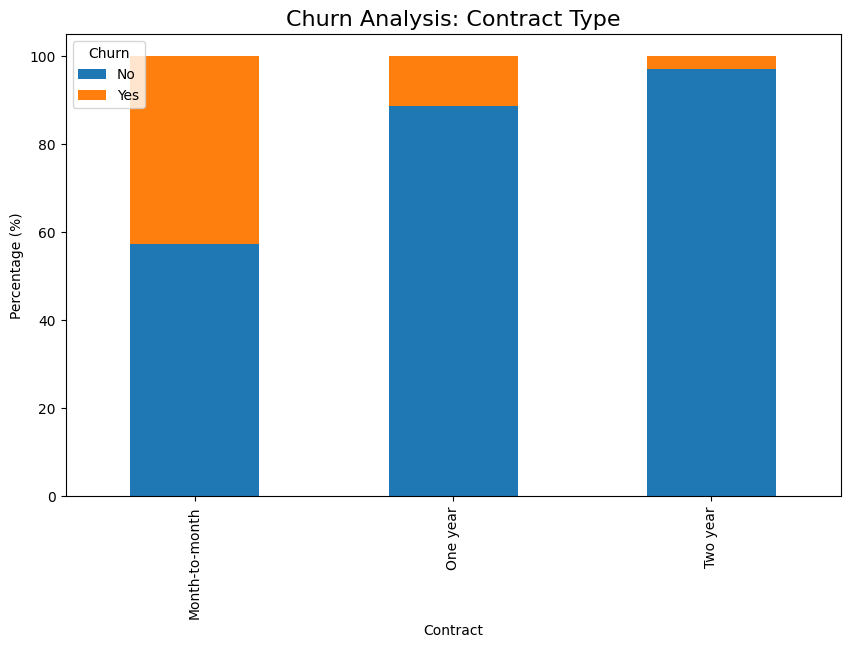

In [9]:
contract_churn = telco_data_cleaned.groupby(['Contract', 'Churn']).size().unstack()
contract_churn_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100
contract_churn_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#1f77b4", "#ff7f0e"])
plt.title("Churn Analysis: Contract Type", fontsize=16)
plt.ylabel("Percentage (%)")
plt.legend(title="Churn")
plt.show()

b. Churn by Payment Method

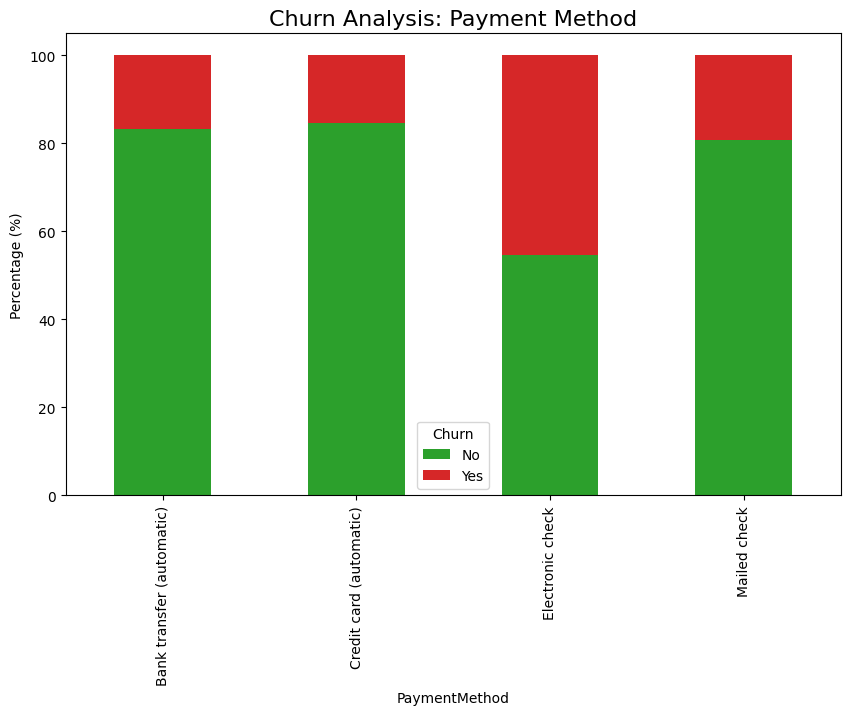

In [10]:
payment_churn = telco_data_cleaned.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_churn_pct = payment_churn.div(payment_churn.sum(axis=1), axis=0) * 100
payment_churn_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=["#2ca02c", "#d62728"])
plt.title("Churn Analysis: Payment Method", fontsize=16)
plt.ylabel("Percentage (%)")
plt.legend(title="Churn")
plt.show()


c. Churn by Internet Service (Heatmap)

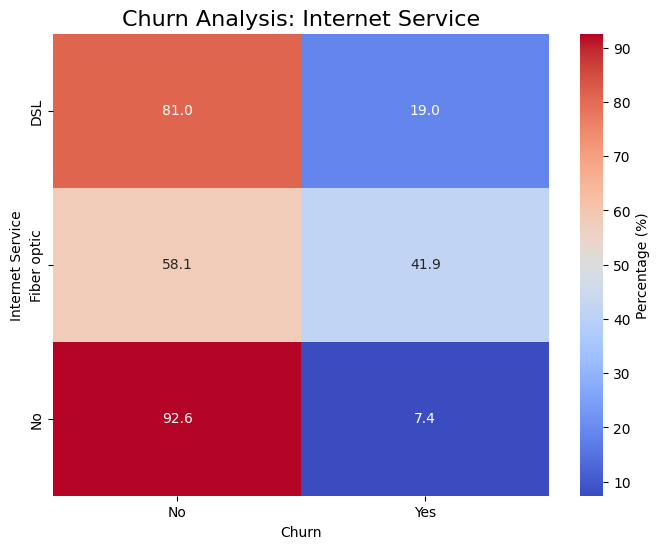

In [11]:
internet_churn = telco_data_cleaned.groupby(['InternetService', 'Churn']).size().unstack()
internet_churn_pct = internet_churn.div(internet_churn.sum(axis=1), axis=0) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(internet_churn_pct, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Percentage (%)'})
plt.title("Churn Analysis: Internet Service", fontsize=16)
plt.ylabel("Internet Service")
plt.xlabel("Churn")
plt.show()


# Fnal Output

In [12]:
cleaned_file_path = '/content/drive/MyDrive/saiket_systems/Cleaned_Telco_Customer_Churn.csv'
telco_data_cleaned.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved at:", cleaned_file_path)


Cleaned dataset saved at: /content/drive/MyDrive/saiket_systems/Cleaned_Telco_Customer_Churn.csv
